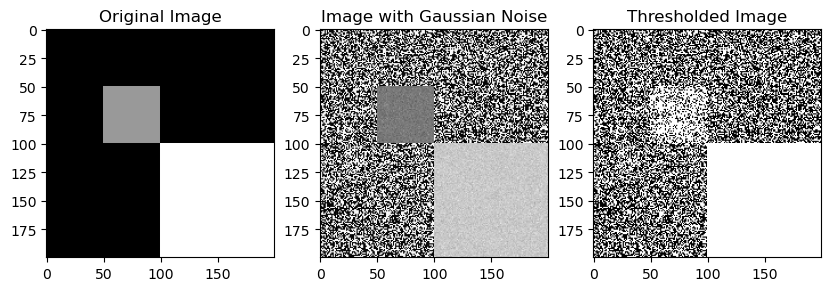

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create an image with 2 squares and a background
img = np.zeros((200, 200), np.uint8)
img[50:100, 50:100] = 120
img[100:200, 100:200] = 200

# Add Gaussian noise to the image
gauss = np.random.normal(0, 10, (200, 200))
img_with_noise = img + gauss.astype(np.uint8)

# Apply Otsu's algorithm to the noisy image
otsu_threshold, otsu_img = cv2.threshold(img_with_noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image, noisy image, and the thresholded image
cv2.imshow("Original Image", img)
cv2.imshow("Image with Gaussian Noise", img_with_noise)
cv2.imshow("Thresholded Image", otsu_img)

# Display the original image, noisy image, and the thresholded image
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_with_noise, cmap='gray')
axs[1].set_title('Image with Gaussian Noise')
axs[2].imshow(otsu_img, cmap='gray')
axs[2].set_title('Thresholded Image')
plt.show()

OTSU algorithm without using libraries

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create an image with 2 squares and a background
img = np.zeros((200, 200), np.uint8)
img[50:100, 50:100] = 120
img[100:200, 100:200] = 200

# Add Gaussian noise to the image
gauss = np.random.normal(0, 10, (200, 200))
img_with_noise = img + gauss.astype(np.uint8)



def otsu_thresholding(img):
    # Calculate the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calculate the cumulative sum of the histogram
    cum_sum = np.cumsum(hist)

    # Calculate the cumulative mean of the histogram
    cum_mean = np.cumsum(hist * bins[:-1]) / cum_sum

    # Calculate the global mean of the image
    global_mean = np.mean(img)

    # Calculate the between-class variance for all possible thresholds
    between_class_var = (cum_sum * cum_mean - global_mean * cum_sum) ** 2 / (cum_sum * (1 - cum_sum))

    # Find the threshold that maximizes the between-class variance
    threshold = np.argmax(between_class_var)

    # Threshold the image using the optimal threshold
    _, thresholded_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    return threshold, thresholded_img
otsu_threshold, otsu_img = otsu_thresholding(img_with_noise)


Text(0.5, 1.0, 'Thresholded Image')

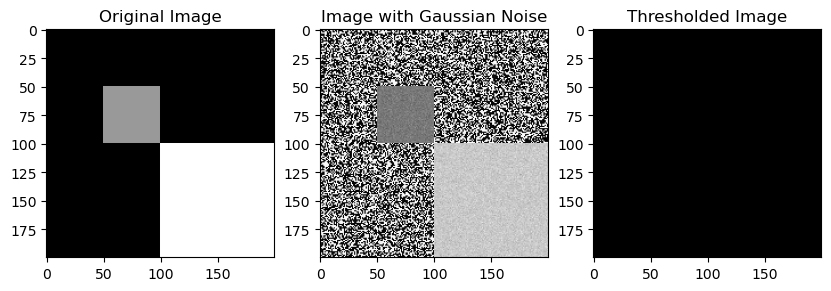

In [7]:
# Display the original image, noisy image, and the thresholded image
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_with_noise, cmap='gray')
axs[1].set_title('Image with Gaussian Noise')
axs[2].imshow(otsu_img, cmap='gray')
axs[2].set_title('Thresholded Image')


Question 2

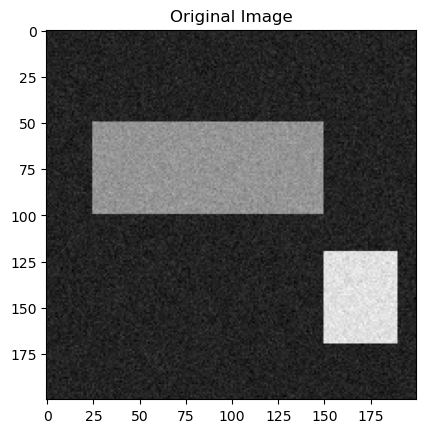

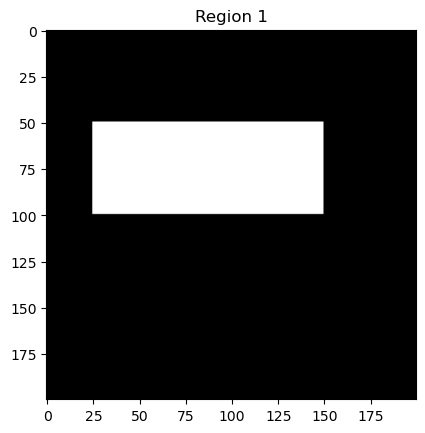

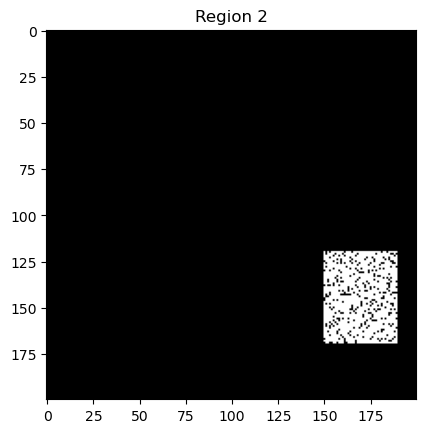

In [8]:
import random

def region_growing(input_img, seed, threshold_range):
    
    # Define the criteria to terminate the loop 
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
    
    # Create a binary image with the same size as input image
    region = np.zeros_like(input_img, dtype=np.uint8)
    # Initialize the region with the seed point=1 to start process
    region[seed] = 1
    
    # region growing starts
    while True:
        # Defining the boundary as the pixels of current  region
        boundary = cv2.dilate(region, None) - region
        
        # if no any pixels found
        new_pixels = np.where(np.logical_and(boundary, np.logical_and(input_img >= threshold_range[0], image <= threshold_range[1])))
        if new_pixels[0].size == 0:
            break
        #add new pixels
        for i in range(new_pixels[0].size):
            pixel = (new_pixels[0][i], new_pixels[1][i])
            region[pixel] = 1
            
        # Check if the region has stopped growing
        if cv2.waitKey(1) == 20:
            break
    #return binary image of segmented region    
    return region


# input the image as same intensities in part1
image = np.zeros((200, 200))
image[50:100, 25:150] = 120
image[120:170,150:190] = 200

# Adding Gaussian noise to the input image
mean = 0
variance = 100
sigma = np.sqrt(variance)
gaussian_noise = np.random.normal(mean, sigma, image.shape)
image = image + gaussian_noise


# Define the seed points for the region growing algorithm
seed1 = (70, 70)
seed2 = (150, 150)

# Apply region growing with different thresholds to obtain two regions
region1 = region_growing(image, seed1, (60, 210))
region2 = region_growing(image, seed2, (60, 210))

# Display the original image 
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

#Display segmented region1
plt.imshow(region1, cmap='gray')
plt.title("Region 1")
plt.show()

#Display segmented region2
plt.imshow(region2, cmap='gray')
plt.title("Region 2")
plt.show()